# Librerias

In [261]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Analisis de Datos

In [262]:
df=pd.read_csv("10ee9a62-5fac-430a-92df-6526ebc6a38f.csv", sep=",", encoding="latin-1")

Se realiza una lectura del cojunto de datos

In [263]:
df.head()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20152,TI,SB11201520043269,URBANO,N,A,ACADÃMICO,1.053760e+11,105376000113,5,...,No,No,Si,A1,49.0,52.0,49,45,52,247
1,20152,TI,SB11201520486210,URBANO,N,A,TÃCNICO/ACADÃMICO,1.110010e+11,111001019411,11,...,Si,Si,Si,A-,44.0,72.0,60,62,59,309
2,20152,TI,SB11201520344372,RURAL,NaN,A,ACADÃMICO,2.413570e+11,241357000693,41,...,Si,No,No,A-,44.0,46.0,38,42,38,206
3,20152,TI,SB11201520036842,URBANO,NaN,A,ACADÃMICO,3.110011e+11,311001089710,11,...,Si,Si,Si,A-,44.0,47.0,57,47,58,258
4,20152,TI,SB11201520335295,RURAL,N,A,ACADÃMICO,2.134300e+11,213430002612,13,...,No,No,Si,A1,55.0,44.0,45,53,41,232


## Perfilamiento de datos

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570464 entries, 0 to 570463
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   periodo                        570464 non-null  int64  
 1   estu_tipodocumento             570464 non-null  object 
 2   estu_consecutivo               570464 non-null  object 
 3   cole_area_ubicacion            570464 non-null  object 
 4   cole_bilingue                  500737 non-null  object 
 5   cole_calendario                570464 non-null  object 
 6   cole_caracter                  566761 non-null  object 
 7   cole_cod_dane_establecimiento  570397 non-null  float64
 8   cole_cod_dane_sede             570464 non-null  int64  
 9   cole_cod_depto_ubicacion       570464 non-null  int64  
 10  cole_cod_mcpio_ubicacion       570464 non-null  int64  
 11  cole_codigo_icfes              570464 non-null  int64  
 12  cole_depto_ubicacion          

In [265]:
df.describe()

,periodo,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,570464.000000,5.703970e+05,5.704640e+05,570464.000000,570464.000000,570464.000000,569976.000000,570355.000000,570459.000000,570459.000000,570062.000000,570441.000000,570464.000000,570464.000000,570464.000000,570464.000000
mean,20151.954470,2.104797e+11,2.117252e+11,32.948503,33174.117348,80665.562390,32.858961,33041.559520,78.368624,33111.624469,50.727858,50.357097,50.050902,50.276589,49.923127,250.841734
std,0.208463,9.537320e+10,9.867031e+10,26.806804,26830.540968,54457.391188,26.837899,26868.783311,1821.499977,26857.885345,11.463933,12.269154,11.420422,10.401071,9.533100,48.752089
min,20151.000000,1.050010e+11,1.050010e+11,5.000000,5001.000000,18.000000,5.000000,8.000000,5.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20152.000000,1.190010e+11,1.190010e+11,11.000000,11001.000000,29215.000000,11.000000,11001.000000,11.000000,11001.000000,43.000000,42.000000,43.000000,43.000000,43.000000,216.000000
50%,20152.000000,1.760010e+11,1.760010e+11,20.000000,20238.000000,80176.000000,20.000000,20011.000000,20.000000,20060.000000,49.000000,49.000000,50.000000,50.000000,49.000000,246.000000
75%,20152.000000,3.110010e+11,3.110010e+11,54.000000,54498.000000,124750.000000,54.000000,54498.000000,54.000000,54498.000000,54.000000,57.000000,57.000000,56.000000,56.000000,280.000000
max,20152.000000,5.684320e+11,8.548740e+11,99.000000,99773.000000,631622.000000,99.000000,99773.000000,99999.000000,99999.000000,100.000000,100.000000,100.000000,100.000000,100.000000,492.000000


In [266]:
df.columns = df.columns.str.upper()

print(df.columns)

Index(['PERIODO', 'ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO',
       'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE',
       'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION',
       'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 'COLE_GENERO',
       'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_FECHANACIMIENTO',
       'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE',
       'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE', 'ESTU_PRIVADO_LIBERTAD',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSO

In [267]:
var_cat=df.select_dtypes(include=['object'])
var_cat_list=var_cat.columns.tolist()
var_cat_list

['ESTU_TIPODOCUMENTO',
 'ESTU_CONSECUTIVO',
 'COLE_AREA_UBICACION',
 'COLE_BILINGUE',
 'COLE_CALENDARIO',
 'COLE_CARACTER',
 'COLE_DEPTO_UBICACION',
 'COLE_GENERO',
 'COLE_JORNADA',
 'COLE_MCPIO_UBICACION',
 'COLE_NATURALEZA',
 'COLE_NOMBRE_ESTABLECIMIENTO',
 'COLE_NOMBRE_SEDE',
 'COLE_SEDE_PRINCIPAL',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_DEPTO_RESIDE',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_ESTUDIANTE',
 'ESTU_FECHANACIMIENTO',
 'ESTU_GENERO',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_MCPIO_RESIDE',
 'ESTU_NACIONALIDAD',
 'ESTU_PAIS_RESIDE',
 'ESTU_PRIVADO_LIBERTAD',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONMADRE',
 'FAMI_EDUCACIONPADRE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'DESEMP_INGLES']

In [268]:
var_cat

,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,...,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES
0,TI,SB11201520043269,URBANO,N,A,ACADÃMICO,ANTIOQUIA,MIXTO,TARDE,LA CEJA,...,Cuatro,Primaria completa,Primaria completa,Estrato 2,Siete,No,No,No,Si,A1
1,TI,SB11201520486210,URBANO,N,A,TÃCNICO/ACADÃMICO,BOGOTA,MIXTO,MAÃANA,BOGOTÃ D.C.,...,Dos,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Estrato 2,Seis,No,Si,Si,Si,A-
2,TI,SB11201520344372,RURAL,NaN,A,ACADÃMICO,HUILA,MIXTO,COMPLETA,IQUIRA,...,Cuatro,Primaria incompleta,Secundaria (Bachillerato) completa,Estrato 1,Ocho,No,Si,No,No,A-
3,TI,SB11201520036842,URBANO,NaN,A,ACADÃMICO,BOGOTA,MIXTO,COMPLETA,BOGOTÃ D.C.,...,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Estrato 1,Cinco,No,Si,Si,Si,A-
4,TI,SB11201520335295,RURAL,N,A,ACADÃMICO,BOLIVAR,MIXTO,MAÃANA,MAGANGUE,...,Cuatro,Primaria incompleta,Secundaria (Bachillerato) completa,Estrato 1,Siete,No,No,No,Si,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570459,TI,SB11201520576475,URBANO,N,A,ACADÃMICO,CORDOBA,MIXTO,MAÃANA,MONTERIA,...,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 1,Cinco,No,Si,Si,Si,A1
570460,TI,SB11201520279612,URBANO,N,A,ACADÃMICO,ANTIOQUIA,MIXTO,MAÃANA,MEDELLIN,...,Uno,Primaria completa,No sabe,Estrato 2,Dos,No,Si,Si,Si,A1
570461,TI,SB11201520094586,URBANO,N,A,TÃCNICO/ACADÃMICO,CESAR,MIXTO,MAÃANA,AGUSTIN CODAZZI,...,Dos,Primaria incompleta,Primaria completa,Estrato 1,Cuatro,No,No,No,Si,A1
570462,TI,SB11201520070683,URBANO,N,A,TÃCNICO/ACADÃMICO,LA GUAJIRA,MIXTO,MAÃANA,VILLANUEVA,...,Uno,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Estrato 1,Seis,No,No,No,No,A1


In [269]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("\n")

PERIODO
PERIODO
20152    544491
20151     25973
Name: count, dtype: int64


ESTU_TIPODOCUMENTO
ESTU_TIPODOCUMENTO
TI     449535
CC     110041
CR      10466
CE        307
PE         84
PC         12
RC         10
V           6
NIP         2
NUI         1
Name: count, dtype: int64


ESTU_CONSECUTIVO
ESTU_CONSECUTIVO
SB11201520057011    2
SB11201520131422    2
SB11201520075367    2
SB11201520109434    2
SB11201520030345    2
                   ..
SB11201520575439    1
SB11201520268464    1
SB11201520334530    1
SB11201520252826    1
SB11201520342501    1
Name: count, Length: 568397, dtype: int64


COLE_AREA_UBICACION
COLE_AREA_UBICACION
URBANO    490822
RURAL      79642
Name: count, dtype: int64


COLE_BILINGUE
COLE_BILINGUE
N    491209
S      9528
Name: count, dtype: int64


COLE_CALENDARIO
COLE_CALENDARIO
A       551431
B        15192
OTRO      3841
Name: count, dtype: int64


COLE_CARACTER
COLE_CARACTER
ACADÃMICO             313766
TÃCNICO/ACADÃMICO    190766
TÃCNICO               

Al realizar un analisis sobre cada unos de las columnas, pudimos llegar a las siguientes conclusiones: 

1. La variable ESTU_CONSECUTIVO, la cual indica el identificar del estudiante examinado, muestra que en ciertas ocasiones, el estudiante puede llegar a presentar el examen en mas de una ocasion. Para nuestro requerimiento analitico, no tenemos en cuenta si un estudiante repite o no la prueba. Este id no se va a tener en cuenta. 
2. Considerando el requerimiento analitico, no es importan incluir variables que determinan el departamento o municipio donde realizaron las pruebas. Es importante que se tenga en cuenta en donde residen los estudiantes. No se tiene en cuenta las variables ESTU_COD_DEPTO_PRESENTACION Y ESTU_COD_MCPIO_PRESENTACION, ESTU_DEPTO_PRESENTACION, ESTU_MCPIO_PRESENTACION.  
3. No es de nuestra importancia hacer uso de la columna de ESTU_ESTADOINVESTIGACION debido a la naturaleza de la variable. 
4. La variable ESTU_ESTUDIANTE, no nos brinda informacion valiosa unicamente tiene una clase. 
5. La variable de ESTU_FECHANACIMIENTO no nos brinda informacion valiosa, es mejor tener en cuenta la edad. Usaremos esta variables para crear la columna de edad. 
6. El desbalance de la variable de ESTU_PRIVADO_LIBERTAD no nos brinda informacion adicional sobre el requerimiento analitico y el enfoque. 


In [270]:
df=df.drop(columns=["ESTU_CONSECUTIVO", "ESTU_COD_DEPTO_PRESENTACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_DEPTO_PRESENTACION", "ESTU_MCPIO_PRESENTACION", "ESTU_ESTADOINVESTIGACION", "ESTU_ESTUDIANTE", "ESTU_PRIVADO_LIBERTAD" ])

In [271]:
print(df['ESTU_FECHANACIMIENTO'].head(10))



0    25/03/1998
1    03/08/1998
2    14/01/1996
3    16/10/1998
4    19/03/1996
5    08/06/1997
6    31/12/1998
7    04/03/1998
8    14/01/1999
9    16/04/1999
Name: ESTU_FECHANACIMIENTO, dtype: object


In [272]:
# Función para convertir el formato de fecha si es necesario
def ajustar_formato_fecha(fecha_str):
    """Convierte el formato de fecha al formato estándar YYYY-MM-DD"""
    try:
        # Intentar identificar el formato (aquí un ejemplo con formato DD/MM/YYYY)
        if '/' in fecha_str:
            partes = fecha_str.split('/')
            if len(partes) == 3:
                # Asumiendo formato DD/MM/YYYY
                return int(partes[2])
        # Si ya está en formato YYYY-MM-DD, devolverlo tal cual
        return fecha_str
    except:
        return None

# Aplicar la función para crear la columna de edad
# Primero ajustamos el formato si es necesario
df['fecha_formateada'] = df['ESTU_FECHANACIMIENTO'].apply(ajustar_formato_fecha)

# Luego calculamos la edad
#df['EDAD'] = 2025 - df['ESTU_FECHANACIMIENTO'].str[-4:].astype(int)

# Eliminamos la columna temporal
df = df.drop(columns=['fecha_formateada'])

# Mostramos información sobre la nueva columna
#print("\nEstadísticas de la columna EDAD:")
#print(df['EDAD'].describe())

In [273]:
df["ESTU_FECHANACIMIENTO"].to_list()

['25/03/1998',
 '03/08/1998',
 '14/01/1996',
 '16/10/1998',
 '19/03/1996',
 '08/06/1997',
 '31/12/1998',
 '04/03/1998',
 '14/01/1999',
 '16/04/1999',
 '03/04/1998',
 '22/07/1997',
 '03/12/1997',
 '14/02/1999',
 '23/10/1998',
 '12/06/1998',
 '18/05/1998',
 '03/08/1997',
 '20/04/1997',
 '16/08/1998',
 '01/03/1996',
 '29/08/1998',
 '26/10/1998',
 '18/01/1999',
 '09/06/1999',
 '23/09/1997',
 '14/09/1998',
 '20/02/1999',
 '12/06/1998',
 '04/12/1996',
 '26/06/1997',
 '06/11/1998',
 '18/05/1997',
 '17/09/1998',
 '22/04/1999',
 '10/06/1999',
 '04/10/1999',
 '19/12/1996',
 '07/11/1995',
 '28/12/1997',
 '02/08/1998',
 '26/03/1999',
 '10/03/1997',
 '05/08/1998',
 '11/05/1999',
 '09/06/1997',
 '13/05/1997',
 '26/09/1996',
 '07/02/1997',
 '23/03/1997',
 '28/05/1998',
 '25/11/1998',
 '10/09/1998',
 '14/12/1996',
 '13/04/1994',
 '30/10/1997',
 '16/08/1998',
 '30/01/1999',
 '05/10/1997',
 '04/11/1998',
 '27/06/1998',
 '16/05/1995',
 '28/05/1997',
 '12/05/1999',
 '12/02/2000',
 '21/02/1999',
 '11/09/19

In [274]:
#df["EDAD"].value_counts()


Existe datos errores en la columna de ESTU_FECHANACIMIENTO, es por esto que decimos no hacer uso de esta para el analisis del requerimiento. 

In [275]:
#df=df.drop(columns=["ESTU_FECHANACIMIENTO", "EDAD"])

In [276]:
df.columns

Index(['PERIODO', 'ESTU_TIPODOCUMENTO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE',
       'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION',
       'COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION',
       'COLE_GENERO', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
       'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_DEPTO_RESIDE', 'ESTU_FECHANACIMIENTO', 'ESTU_GENERO',
       'ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA',
       'DESEMP_INGLES', 'PUNT_INGLES', 'PUNT_MATEMATICAS',
       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA

Teniendo en cuenta que errores, esto invalida la funcionalidad de esta columna. No se hace la columna ESTU_FECHANACIMIENTO. 

In [277]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, columnas=None, return_encoders=False):
    df_encoded = dataframe.copy()

    if columnas is None:
        columnas = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
    
    columnas_existentes = [col for col in columnas if col in df_encoded.columns]
    if len(columnas_existentes) < len(columnas):
        columnas_no_encontradas = set(columnas) - set(columnas_existentes)
        print(f"⚠️ Advertencia: Las siguientes columnas no existen en el DataFrame: {columnas_no_encontradas}")
    
    encoders = {}

    for columna in columnas_existentes:
        le = LabelEncoder()

        if df_encoded[columna].isna().any():
            print(f"⚠️ La columna '{columna}' contiene valores NaN. Se reemplazarán con 'unknown'.")
            df_encoded[columna] = df_encoded[columna].fillna('unknown')
        
        df_encoded[columna] = le.fit_transform(df_encoded[columna])
        encoders[columna] = le  # Guardamos el encoder

        mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"✅ Columna '{columna}' codificada. Primeros 5 mapeos: {dict(list(mapeo.items())[:5])}{'...' if len(mapeo) > 5 else ''}")

    if return_encoders:
        try:
            joblib.dump(encoders, "encoders.pkl")
            print("✅ Encoders guardados exitosamente en 'encoders.pkl'")
        except Exception as e:
            print(f"❌ Error al guardar los encoders: {e}")
        return df_encoded, encoders
    else:
        return df_encoded

# -----------------------------------------
# USO:
# -----------------------------------------

# Detectar automáticamente columnas categóricas
categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Codificar y exportar
df_encoded, encoders = label_encoder(df, columnas=categoricas, return_encoders=True)


✅ Columna 'ESTU_TIPODOCUMENTO' codificada. Primeros 5 mapeos: {'CC': np.int64(0), 'CE': np.int64(1), 'CR': np.int64(2), 'NIP': np.int64(3), 'NUI': np.int64(4)}...
✅ Columna 'COLE_AREA_UBICACION' codificada. Primeros 5 mapeos: {'RURAL': np.int64(0), 'URBANO': np.int64(1)}
⚠️ La columna 'COLE_BILINGUE' contiene valores NaN. Se reemplazarán con 'unknown'.
✅ Columna 'COLE_BILINGUE' codificada. Primeros 5 mapeos: {'N': np.int64(0), 'S': np.int64(1), 'unknown': np.int64(2)}
✅ Columna 'COLE_CALENDARIO' codificada. Primeros 5 mapeos: {'A': np.int64(0), 'B': np.int64(1), 'OTRO': np.int64(2)}
⚠️ La columna 'COLE_CARACTER' contiene valores NaN. Se reemplazarán con 'unknown'.
✅ Columna 'COLE_CARACTER' codificada. Primeros 5 mapeos: {'ACADÃ\x89MICO': np.int64(0), 'NO APLICA': np.int64(1), 'TÃ\x89CNICO': np.int64(2), 'TÃ\x89CNICO/ACADÃ\x89MICO': np.int64(3), 'unknown': np.int64(4)}
✅ Columna 'COLE_DEPTO_UBICACION' codificada. Primeros 5 mapeos: {'AMAZONAS': np.int64(0), 'ANTIOQUIA': np.int64(1), 'AR

In [278]:
def label_encoder(dataframe, columnas=None, return_encoders=False):
    df_encoded = dataframe.copy()

    if columnas is None:
        columnas = df_encoded.select_dtypes(include=['object']).columns.tolist()
    
  
    columnas_existentes = [col for col in columnas if col in df_encoded.columns]
    if len(columnas_existentes) < len(columnas):
        columnas_no_encontradas = set(columnas) - set(columnas_existentes)
        print(f"Advertencia: Las siguientes columnas no existen en el DataFrame: {columnas_no_encontradas}")
    
    encoders = {}
    
    # Aplicar Label Encoding a cada columna
    for columna in columnas_existentes:
        le = LabelEncoder()

        if df_encoded[columna].isna().any():
  
            print(f"Advertencia: La columna '{columna}' contiene valores NaN. Se reemplazarán con 'unknown'.")
            df_encoded[columna] = df_encoded[columna].fillna('unknown')
        

        df_encoded[columna] = le.fit_transform(df_encoded[columna])

        mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Columna '{columna}' codificada. Primeros 5 mapeos: {dict(list(mapeo.items())[:5])}{'...' if len(mapeo) > 5 else ''}")
        
    if return_encoders:
        return df_encoded, encoders
    else:
        return df_encoded

In [279]:
df_encoded = label_encoder(df)
df_encoded

Columna 'ESTU_TIPODOCUMENTO' codificada. Primeros 5 mapeos: {'CC': np.int64(0), 'CE': np.int64(1), 'CR': np.int64(2), 'NIP': np.int64(3), 'NUI': np.int64(4)}...
Columna 'COLE_AREA_UBICACION' codificada. Primeros 5 mapeos: {'RURAL': np.int64(0), 'URBANO': np.int64(1)}
Advertencia: La columna 'COLE_BILINGUE' contiene valores NaN. Se reemplazarán con 'unknown'.
Columna 'COLE_BILINGUE' codificada. Primeros 5 mapeos: {'N': np.int64(0), 'S': np.int64(1), 'unknown': np.int64(2)}
Columna 'COLE_CALENDARIO' codificada. Primeros 5 mapeos: {'A': np.int64(0), 'B': np.int64(1), 'OTRO': np.int64(2)}
Advertencia: La columna 'COLE_CARACTER' contiene valores NaN. Se reemplazarán con 'unknown'.
Columna 'COLE_CARACTER' codificada. Primeros 5 mapeos: {'ACADÃ\x89MICO': np.int64(0), 'NO APLICA': np.int64(1), 'TÃ\x89CNICO': np.int64(2), 'TÃ\x89CNICO/ACADÃ\x89MICO': np.int64(3), 'unknown': np.int64(4)}
Columna 'COLE_DEPTO_UBICACION' codificada. Primeros 5 mapeos: {'AMAZONAS': np.int64(0), 'ANTIOQUIA': np.int64

,PERIODO,ESTU_TIPODOCUMENTO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20152,8,1,0,0,0,1.053760e+11,105376000113,5,5376,...,3,0,1,1,49.0,52.0,49,45,52,247
1,20152,8,1,0,0,3,1.110010e+11,111001019411,11,11001,...,5,1,1,0,44.0,72.0,60,62,59,309
2,20152,8,0,2,0,0,2.413570e+11,241357000693,41,41357,...,5,0,0,0,44.0,46.0,38,42,38,206
3,20152,8,1,2,0,0,3.110011e+11,311001089710,11,11001,...,5,1,1,0,44.0,47.0,57,47,58,258
4,20152,8,0,0,0,0,2.134300e+11,213430002612,13,13430,...,3,0,1,1,55.0,44.0,45,53,41,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570459,20152,8,1,0,0,0,1.230010e+11,123001003741,23,23001,...,5,1,1,1,50.0,50.0,59,45,54,259
570460,20152,8,1,0,0,0,1.050010e+11,105001001368,5,5001,...,5,1,1,1,50.0,39.0,56,51,63,260
570461,20152,8,1,0,0,3,1.200130e+11,120013000471,20,20013,...,3,0,1,1,49.0,39.0,34,49,43,209
570462,20152,8,1,0,0,3,1.448740e+11,144874000517,44,44874,...,3,0,0,1,54.0,47.0,56,48,58,262


In [280]:
df_encoded.head()

,PERIODO,ESTU_TIPODOCUMENTO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20152,8,1,0,0,0,1.053760e+11,105376000113,5,5376,...,3,0,1,1,49.0,52.0,49,45,52,247
1,20152,8,1,0,0,3,1.110010e+11,111001019411,11,11001,...,5,1,1,0,44.0,72.0,60,62,59,309
2,20152,8,0,2,0,0,2.413570e+11,241357000693,41,41357,...,5,0,0,0,44.0,46.0,38,42,38,206
3,20152,8,1,2,0,0,3.110011e+11,311001089710,11,11001,...,5,1,1,0,44.0,47.0,57,47,58,258
4,20152,8,0,0,0,0,2.134300e+11,213430002612,13,13430,...,3,0,1,1,55.0,44.0,45,53,41,232


In [281]:
df.columns

Index(['PERIODO', 'ESTU_TIPODOCUMENTO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE',
       'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION',
       'COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION',
       'COLE_GENERO', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
       'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_DEPTO_RESIDE', 'ESTU_FECHANACIMIENTO', 'ESTU_GENERO',
       'ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA',
       'DESEMP_INGLES', 'PUNT_INGLES', 'PUNT_MATEMATICAS',
       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA

In [282]:
df_encoded=df_encoded.drop_duplicates()

Se eliminan los datos duplicados

In [283]:
df_encoded=df_encoded.dropna()

Se eliminana todas las filas que tengan al menos un valor NaN

In [284]:
df_encoded.isnull().sum()

PERIODO                          0
ESTU_TIPODOCUMENTO               0
COLE_AREA_UBICACION              0
COLE_BILINGUE                    0
COLE_CALENDARIO                  0
COLE_CARACTER                    0
COLE_COD_DANE_ESTABLECIMIENTO    0
COLE_COD_DANE_SEDE               0
COLE_COD_DEPTO_UBICACION         0
COLE_COD_MCPIO_UBICACION         0
COLE_CODIGO_ICFES                0
COLE_DEPTO_UBICACION             0
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
COLE_NATURALEZA                  0
COLE_NOMBRE_ESTABLECIMIENTO      0
COLE_NOMBRE_SEDE                 0
COLE_SEDE_PRINCIPAL              0
ESTU_COD_RESIDE_DEPTO            0
ESTU_COD_RESIDE_MCPIO            0
ESTU_DEPTO_RESIDE                0
ESTU_FECHANACIMIENTO             0
ESTU_GENERO                      0
ESTU_MCPIO_RESIDE                0
ESTU_NACIONALIDAD                0
ESTU_PAIS_RESIDE                 0
FAMI_CUARTOSHOGAR                0
FAMI_EDUCACIONMADRE 

In [285]:
plt.figure(figsize=(250, 100))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

plt.title('Correlación price y resto de variables')
plt.show()

In [286]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567923 entries, 0 to 570463
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PERIODO                        567923 non-null  int64  
 1   ESTU_TIPODOCUMENTO             567923 non-null  int64  
 2   COLE_AREA_UBICACION            567923 non-null  int64  
 3   COLE_BILINGUE                  567923 non-null  int64  
 4   COLE_CALENDARIO                567923 non-null  int64  
 5   COLE_CARACTER                  567923 non-null  int64  
 6   COLE_COD_DANE_ESTABLECIMIENTO  567923 non-null  float64
 7   COLE_COD_DANE_SEDE             567923 non-null  int64  
 8   COLE_COD_DEPTO_UBICACION       567923 non-null  int64  
 9   COLE_COD_MCPIO_UBICACION       567923 non-null  int64  
 10  COLE_CODIGO_ICFES              567923 non-null  int64  
 11  COLE_DEPTO_UBICACION           567923 non-null  int64  
 12  COLE_GENERO                    5679

REVISEMOS SI HACER EL ANALISIS POR DEPARTAMENTO Y MUNICIPIO, O SI ES IMPORTANTE TENER EN CUENTA ESTAS VARIABLES. 

In [287]:
df_encoded.columns

Index(['PERIODO', 'ESTU_TIPODOCUMENTO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE',
       'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION',
       'COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION',
       'COLE_GENERO', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
       'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_DEPTO_RESIDE', 'ESTU_FECHANACIMIENTO', 'ESTU_GENERO',
       'ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA',
       'DESEMP_INGLES', 'PUNT_INGLES', 'PUNT_MATEMATICAS',
       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA

In [288]:
df_encoded=df_encoded.drop(columns=["ESTU_NACIONALIDAD", "COLE_CODIGO_ICFES"])

1. Para nuestro requerimiento analitico, no tenemos que tener en cuent la nacionalidad del estudiante, es importante tener en cuenta la informacion actual de donde reside, su familia y demas caracteristicas socia-economicas. 
2. La variable de COLE_CODIGO_ICFES, es un codigo que le asigna el ICFES a un colegio, sin embargo, tenemos informacion como el nombre del colegio y demas caracteristicas que unicamente tiene sentido para el negocio tener en cuenta una de las dos variables. 

In [289]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567923 entries, 0 to 570463
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PERIODO                        567923 non-null  int64  
 1   ESTU_TIPODOCUMENTO             567923 non-null  int64  
 2   COLE_AREA_UBICACION            567923 non-null  int64  
 3   COLE_BILINGUE                  567923 non-null  int64  
 4   COLE_CALENDARIO                567923 non-null  int64  
 5   COLE_CARACTER                  567923 non-null  int64  
 6   COLE_COD_DANE_ESTABLECIMIENTO  567923 non-null  float64
 7   COLE_COD_DANE_SEDE             567923 non-null  int64  
 8   COLE_COD_DEPTO_UBICACION       567923 non-null  int64  
 9   COLE_COD_MCPIO_UBICACION       567923 non-null  int64  
 10  COLE_DEPTO_UBICACION           567923 non-null  int64  
 11  COLE_GENERO                    567923 non-null  int64  
 12  COLE_JORNADA                   5679

### Completitud

In [290]:
((df_encoded.isnull().sum()/df_encoded.shape[0])).sort_values(ascending=False)

PERIODO                          0.0
ESTU_FECHANACIMIENTO             0.0
ESTU_MCPIO_RESIDE                0.0
ESTU_PAIS_RESIDE                 0.0
FAMI_CUARTOSHOGAR                0.0
FAMI_EDUCACIONMADRE              0.0
FAMI_EDUCACIONPADRE              0.0
FAMI_ESTRATOVIVIENDA             0.0
FAMI_PERSONASHOGAR               0.0
FAMI_TIENEAUTOMOVIL              0.0
FAMI_TIENECOMPUTADOR             0.0
FAMI_TIENEINTERNET               0.0
FAMI_TIENELAVADORA               0.0
DESEMP_INGLES                    0.0
PUNT_INGLES                      0.0
PUNT_MATEMATICAS                 0.0
PUNT_SOCIALES_CIUDADANAS         0.0
PUNT_C_NATURALES                 0.0
PUNT_LECTURA_CRITICA             0.0
ESTU_GENERO                      0.0
ESTU_DEPTO_RESIDE                0.0
ESTU_TIPODOCUMENTO               0.0
ESTU_COD_RESIDE_MCPIO            0.0
COLE_AREA_UBICACION              0.0
COLE_BILINGUE                    0.0
COLE_CALENDARIO                  0.0
COLE_CARACTER                    0.0
C

### Unicidad

In [291]:
duplicados=df_encoded[df_encoded.duplicated()].value_counts()
print(duplicados)

Series([], Name: count, dtype: int64)


# Exploración de los datos

### Para la exploración se hará uso de pandas profiling

In [292]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_encoded, title="Exploración de los datos post limpieza")
profile.to_file("reporte_exploracion encoded.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


#### Eliminación de variables
Teniendo en cuenta la exploración de datos se eliminaran las variabes que cuenten con una alta correlación para evitar la redundancia de información.

In [293]:
df_encoded=df_encoded.drop(columns=["COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE"])
df_encoded=df_encoded.drop(columns=["COLE_COD_DEPTO_UBICACION", "ESTU_DEPTO_RESIDE", "DESEMP_INGLES", "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA"])


In [294]:
df_encoded=df_encoded.drop(columns=["COLE_COD_MCPIO_UBICACION", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_NOMBRE_SEDE"])

df_encoded=df_encoded.drop(columns=["PUNT_C_NATURALES", "PUNT_INGLES", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS" ])


In [295]:
df_encoded=df_encoded.drop(columns=["COLE_DEPTO_UBICACION", "COLE_CALENDARIO", "ESTU_COD_RESIDE_DEPTO", "ESTU_TIPODOCUMENTO", "COLE_JORNADA", "ESTU_PAIS_RESIDE", "ESTU_COD_RESIDE_MCPIO", "PERIODO", "ESTU_FECHANACIMIENTO"])


In [296]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_encoded, title="Exploración de los datos post limpieza")
profile.to_file("reporte_exploracion POST.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 83.47it/s]


In [297]:
df_encoded["alto_desempeño"] = df_encoded["PUNT_GLOBAL"] >= 310


In [298]:
df_encoded.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CARACTER,COLE_GENERO,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,ESTU_MCPIO_RESIDE,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,PUNT_GLOBAL,alto_desempeño
0,1,0,0,2,422,1,9,336,428,2,11,7,3,20,8,3,247,False
1,1,0,3,2,100,1,9,336,99,4,14,10,3,19,8,5,309,False
2,0,2,0,2,400,1,9,336,1031,2,12,9,2,13,8,5,206,False
3,1,2,0,2,100,0,9,336,99,2,13,7,2,0,8,5,258,False
4,0,0,0,2,485,1,9,335,490,2,12,9,2,20,8,3,232,False


In [299]:
import scikeras
print("scikeras version:", scikeras.__version__)


scikeras version: 0.13.0


In [300]:
from scikeras.wrappers import KerasClassifier

print("✅ Usando esta clase:", KerasClassifier)
print("📦 Módulo origen:", KerasClassifier.__module__)


✅ Usando esta clase: <class 'scikeras.wrappers.KerasClassifier'>
📦 Módulo origen: scikeras.wrappers


Reloading Tuner from tuning_resultados/modelo_funcional/tuner0.json
Mejores hiperparámetros encontrados:
Unidades: 64
Activación: relu
Capa oculta adicional: 24


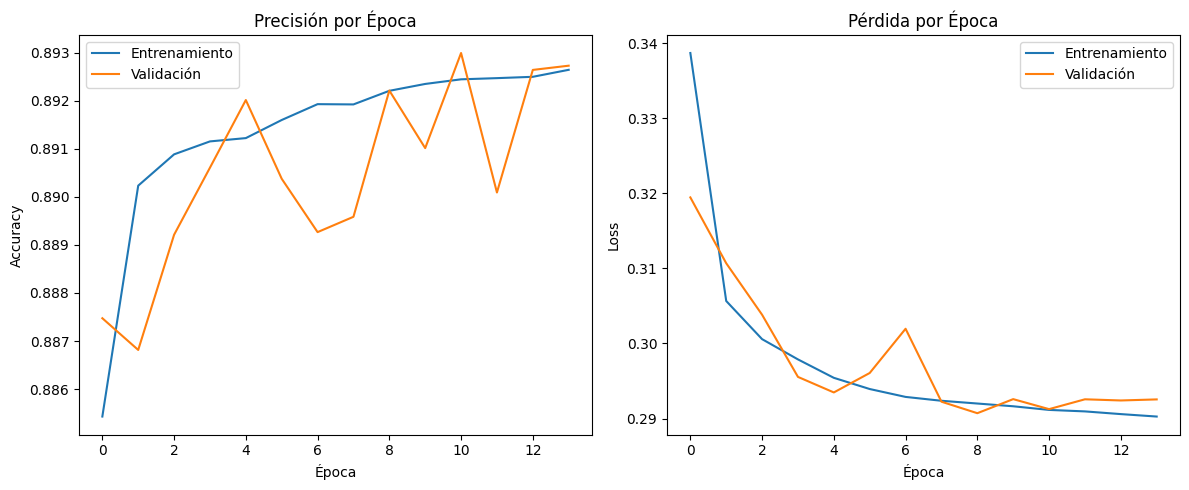

Precisión en test: 0.8921


In [301]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import matplotlib.pyplot as plt

# ---------------------------
# Paso 0: Preparar datos
# ---------------------------
X = df_encoded.drop(columns=["alto_desempeño", "PUNT_GLOBAL"])
y = df_encoded["alto_desempeño"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

input_dim = X_train.shape[1]

# ---------------------------
# Definir modelo 
# ---------------------------
def build_model(hp):
    inputs = Input(shape=(input_dim,))
    x = Dense(
        units=hp.Choice('units', [16, 32, 64]),
        activation=hp.Choice('activation', ['relu', 'tanh'])
    )(inputs)
    x = Dense(units=hp.Int('hidden_units', min_value=8, max_value=64, step=8), activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------
#  Configurar tuner
# ---------------------------
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning_resultados',
    project_name='modelo_funcional'
)

# ---------------------------
#  Búsqueda de hiperparámetros
# ---------------------------
tuner.search(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

# ---------------------------
#  Resultados
# ---------------------------
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = build_model(best_hp)

print("Mejores hiperparámetros encontrados:")
print("Unidades:", best_hp.get('units'))
print("Activación:", best_hp.get('activation'))
print("Capa oculta adicional:", best_hp.get('hidden_units'))

# ---------------------------
# Reentrenar 
# ---------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# ---------------------------
# Gráficas
# ---------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# Evaluación en test
# ---------------------------
loss, acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {acc:.4f}")


In [302]:
import mlflow
import mlflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# ----------------------------
# Prepara los datos
X = df_encoded.drop(columns=["alto_desempeño", "PUNT_GLOBAL"])
y = df_encoded["alto_desempeño"] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

input_dim = X_train.shape[1]

# ----------------------------
# Función para construir y entrenar modelo con logging en MLflow
# ----------------------------
mlflow.set_experiment("modelo_red_neuronal_saber11_v2")

def run_experiment(units=64, activation='relu', hidden_units=24, 
                   epochs=20, batch_size=32):
    run_title = f"h_{epochs}ep_{batch_size}bs"

    with mlflow.start_run(run_name=run_title):

        inputs = Input(shape=(input_dim,))
        x = Dense(units=units, activation=activation)(inputs)
        x = Dense(units=hidden_units, activation=activation)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

        # 2. Callback para EarlyStopping
        early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

        # 3. Entrenamiento
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stop],
            verbose=0
        )
        model.save("best_model.h5")


        # 4. Evaluación
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # 5. Logging en MLflow
        mlflow.log_param("units", units)
        mlflow.log_param("activation", activation)
        mlflow.log_param("hidden_units", hidden_units)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)

        mlflow.log_metric("val_accuracy", max(history.history["val_accuracy"]))
        mlflow.log_metric("val_loss", min(history.history["val_loss"]))
        mlflow.log_metric("test_accuracy", accuracy)
        mlflow.log_metric("test_loss", loss)

        # Guarda el modelo
        mlflow.keras.log_model(model, "model")

        print(f" Accuracy de test: {accuracy:.4f}")
        
        

# ----------------------------
# Correr diferentes casos 
# ----------------------------
run_experiment(units=64, activation="relu", hidden_units=24, epochs=20, batch_size=32)




2025/05/25 15:26:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/25 15:26:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Accuracy de test: 0.8926
